# Example usage of pyRVT

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pyrvt

%matplotlib inline

## Compute several compatible RVT motions

Load the data. There are lots of ways to load the data. Here I am using some predefined events in a CSV format.

In [2]:
ext, periods, events = pyrvt.tools.read_events(
    Path("..") / "examples" / "example_targetSa.csv", "psa"
)
event = events[0]

In [3]:
target_freqs = 1.0 / periods
damping = 0.05
method = "BJ84"

In [4]:
event_keys = ["magnitude", "distance", "region"]
event_kwds = {key: event[key] for key in event_keys}

Create the `CompatbileRvtMotions`. This takes a little time.

In [5]:
%%time
crms = dict()
for method in ["BJ84", "CLH56", "DK85", "LP99", "TM87", "V75"]:
    crms[method] = pyrvt.motions.CompatibleRvtMotion(
        target_freqs,
        event["psa"],
        duration=event["duration"],
        osc_damping=damping,
        event_kwds=event_kwds,
        peak_calculator=pyrvt.tools.get_peak_calculator(method, event_kwds),
    )

CPU times: user 10.9 s, sys: 3.01 ms, total: 10.9 s
Wall time: 11 s


### Plots of the FAS

[Text(0.5, 0, 'Frequency (Hz)'),
 None,
 Text(0, 0.5, 'Fourier amplitude (g/s)'),
 None]

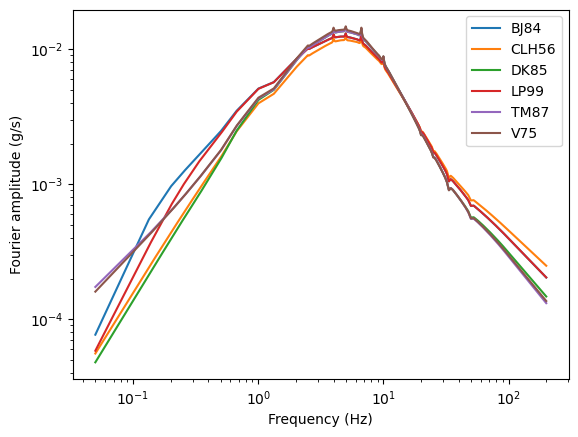

In [6]:
fig, ax = plt.subplots()

for m, crm in crms.items():
    ax.plot(crm.freqs, crm.fourier_amps, label=m)

ax.legend()
ax.set(
    xlabel="Frequency (Hz)",
    xscale="log",
    ylabel="Fourier amplitude (g/s)",
    yscale="log",
)

Here there are some differences due to the differences in the peak factor formulations. The spikes are associated with abrupt transitions in the target response spectra

Calculate the implied attenuation above 30 Hz.

In [7]:
min_freq = 30

In [8]:
print("Attenuation (k_0) sec:")
for m, crm in crms.items():
    print(f"{m}\t{crm.calc_attenuation(min_freq)[0]:0.4f}")

Attenuation (k_0) sec:
BJ84	0.0033
CLH56	0.0030
DK85	0.0037
LP99	0.0033
TM87	0.0039
V75	0.0038


## Plots the response spectra

In [9]:
psas = {m: crm.calc_osc_accels(target_freqs, damping) for m, crm in crms.items()}

[Text(0.5, 0, 'Osc. Frequency (Hz)'),
 None,
 Text(0, 0.5, 'Spectral accel. (g)'),
 None]

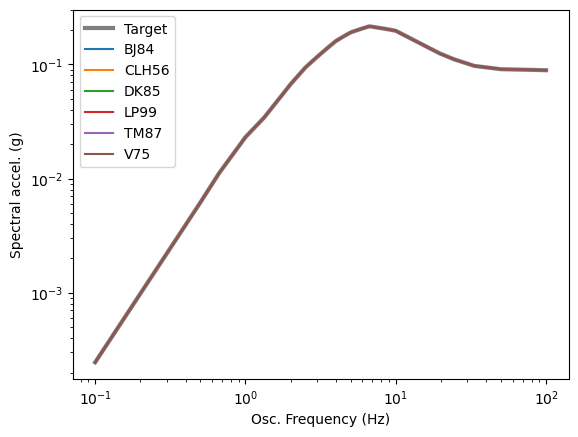

In [10]:
fig, ax = plt.subplots()

ax.plot(target_freqs, event["psa"], color="k", alpha=0.5, linewidth=3, label="Target")

for m, psa in psas.items():
    ax.plot(target_freqs, psa, label=m)


ax.legend()
ax.set(
    xlabel="Osc. Frequency (Hz)",
    xscale="log",
    ylabel="Spectral accel. (g)",
    yscale="log",
)

Here all of the compatible motions match against the target.